# Semantic Segmentation for Self Driving Cars

The goal: Perform semantic segmentation of cars, roads and other details in the environment by using an exisiting datset with labels generated via the CARLA self driving car simualtion.

Data downloaded from: https://www.kaggle.com/kumaresanmanickavelu/lyft-udacity-challenge

## Data setup

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle

In [2]:
%matplotlib inline
from fastai.vision.all import *
from pathlib import Path

## Get the Data

In [3]:
DATA = Path('/storage/self-driving-cars')
DATA.mkdir(exist_ok=True)

Downloading the data from dropbox.

In [4]:
if not os.path.isfile(DATA/'SD_segmentation.zip'):
    url = "https://www.dropbox.com/s/l1a5gmshnn0iudv/SD_segmentation.zip?dl=1"  # dl=1 is important
    import urllib.request
    u = urllib.request.urlopen(url)
    data = u.read()
    u.close()
 
    with open(DATA/"SD_segmentation.zip", "wb") as f :
        f.write(data)

Unzip the downloaded file.

In [5]:
import shutil
if not os.path.exists(DATA/'dataA'):
    shutil.unpack_archive(DATA/'SD_segmentation.zip', extract_dir=DATA)

Checking the path. The zipfile and the unzipped files are there, as expected.

In [6]:
Path('/storage/self-driving-cars').ls()

(#5) [Path('/storage/self-driving-cars/SD_segmentation.zip'),Path('/storage/self-driving-cars/dataB'),Path('/storage/self-driving-cars/dataA'),Path('/storage/self-driving-cars/dataC'),Path('/storage/self-driving-cars/dataD')]

## Exploration of the Data

Lager en path for hver data-mappe.

In [7]:
pathA=Path(DATA/'dataA/dataA/CameraRGB')
pathB=Path(DATA/'dataB/dataB/CameraRGB')
pathC=Path(DATA/'dataC/dataC/CameraRGB')
pathD=Path(DATA/'dataD/dataD/CameraRGB')

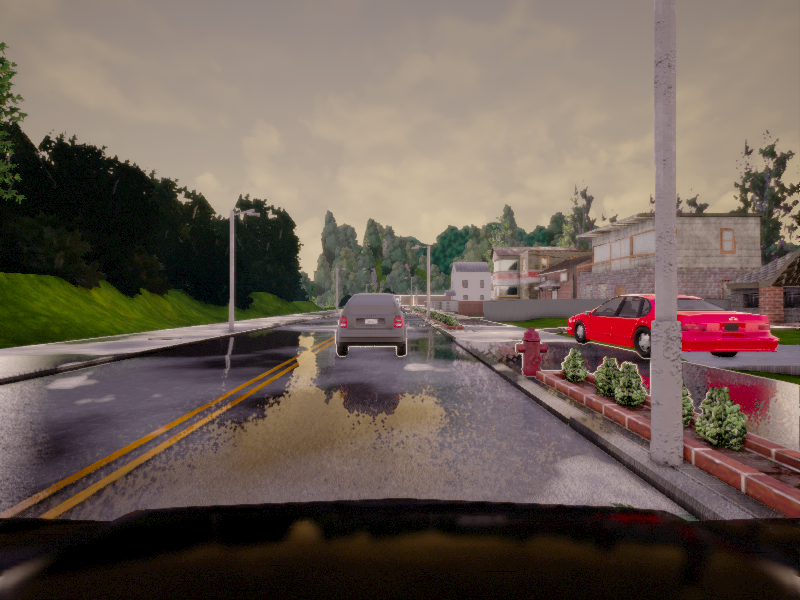

In [8]:
test_img=(pathA).ls()[0]
img=load_image(test_img)
img

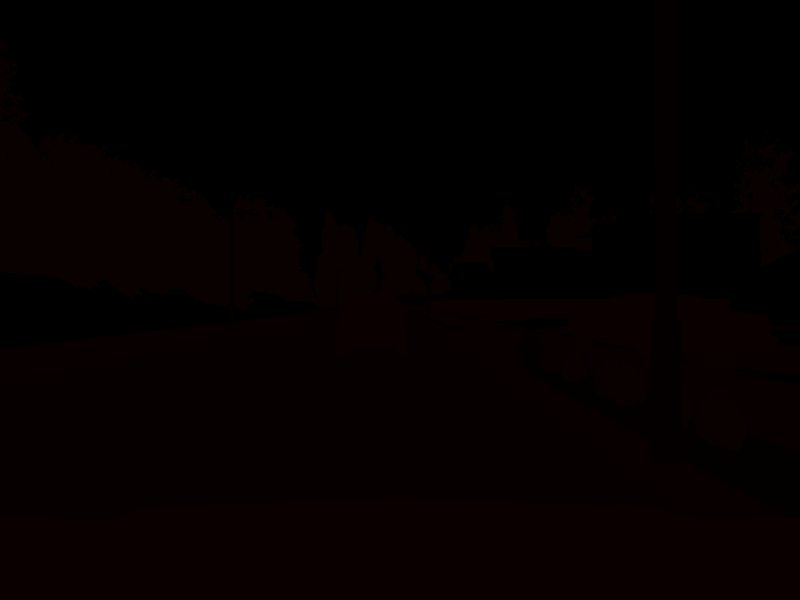

In [9]:
test_img=(DATA/'dataA/dataA/CameraSeg').ls()[0]
img=load_image(test_img)
img

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,dice_multi,time


RuntimeError: CUDA out of memory. Tried to allocate 1.38 GiB (GPU 0; 7.94 GiB total capacity; 5.65 GiB already allocated; 1.10 GiB free; 6.12 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

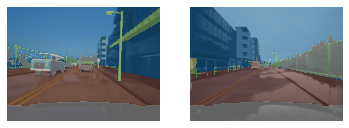

In [10]:
#path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    DATA, bs=8, fnames = get_image_files(pathA), #RGB
    label_func = lambda o: DATA/'dataA/dataA/CameraSeg'/f'{o.stem}{o.suffix}', 
    items_tfms=[Resize((20,20))]
)

dls.c=13
dls.show_batch(max_n=2)

learn = unet_learner(dls, resnet34, metrics=[DiceMulti()])
learn.fine_tune(2)